## Run Higashi embedding

In [14]:
from higashi.Higashi_wrapper import *
# Set the path to the configuration file, change it accordingly
config = "/storage/ireneky/ireneky_cse428/config/config_brain.JSON"

In [15]:
# Initialize the Higashi instance
higashi_model = Higashi(config)

# Data processing (only needs to be run for once)
higashi_model.process_data()
higashi_model.prep_model()

generating start/end dict for chromosome
extracting from data.txt
First calculating how many lines are there
There are 21291441 lines


 - Processing :   0%|          | 0/21291441 [00:00<?, ?it/s]

generating contact maps for baseline
data loaded
21291440 False


creating matrices tasks:   0%|          | 0/15 [00:00<?, ?it/s]

total_feats_size 259


  0%|          | 0/15 [00:00<?, ?it/s]

cpu_num 40
training on data from: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX']
total_sparsity_cell 0.3258552079150086
contractive loss
batch_size 512
Node type num [399 391 262 245 241 241 250 365 321 314 304 300 291 259 250 343] [ 399  790 1052 1297 1538 1779 2029 2394 2715 3029 3333 3633 3924 4183
 4433 4776]
start making attribute


  0%|          | 0/300 [00:00<?, ?it/s]

loss 0.28068462014198303 loss best 0.2813732922077179 epochs 299

initializing data generator


  0%|          | 0/15 [00:00<?, ?it/s]

initializing data generator


  0%|          | 0/15 [00:00<?, ?it/s]

In [16]:
higashi_model.train_for_embeddings()


First stage training
[ Epoch 0 of 5 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6993, mse:  0.5166,  acc: 45.586 %, pearson: 0.506, spearman: 0.356, elapse: 1001.118 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6708,  acc: 60.550 %,pearson: 0.668, spearman: 0.370,elapse: 0.959 s
update_rate: 0.960219	1.206997	update_rate: 0.000000	0.000000	pair_ratio: 0.1	
[ Epoch 1 of 5 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6559, mse:  0.4148,  acc: 59.386 %, pearson: 0.679, spearman: 0.373, elapse: 958.241 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6450,  acc: 61.595 %,pearson: 0.734, spearman: 0.383,elapse: 0.962 s
update_rate: 1.408948	30.202814	pair_ratio: 0.2	
[ Epoch 2 of 5 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6454, mse:  0.3736,  acc: 58.599 %, pearson: 0.715, spearman: 0.383, elapse: 989.425 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6431,  acc: 61.807 %,pearson: 0.746, spearman: 0.382,elapse: 0.945 s
update_rate: 0.167519	1.197398	pair_ratio: 0.3	
[ Epoch 3 of 5 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6441, mse:  0.3577,  acc: 56.255 %, pearson: 0.709, spearman: 0.374, elapse: 966.611 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6466,  acc: 60.996 %,pearson: 0.734, spearman: 0.361,elapse: 0.968 s
update_rate: 0.065830	0.651538	pair_ratio: 0.4	
[ Epoch 4 of 5 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6439, mse:  0.3489,  acc: 53.299 %, pearson: 0.719, spearman: 0.372, elapse: 1136.990 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6442,  acc: 57.751 %,pearson: 0.744, spearman: 0.387,elapse: 0.952 s
update_rate: 0.085150	0.236517	pair_ratio: 0.5	


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

  - (Validation-hyper) bce:  0.7584,  acc: 52.325 %, auc: 0.780, aupr: 0.382,elapse: 4.488 s


(399, 128)


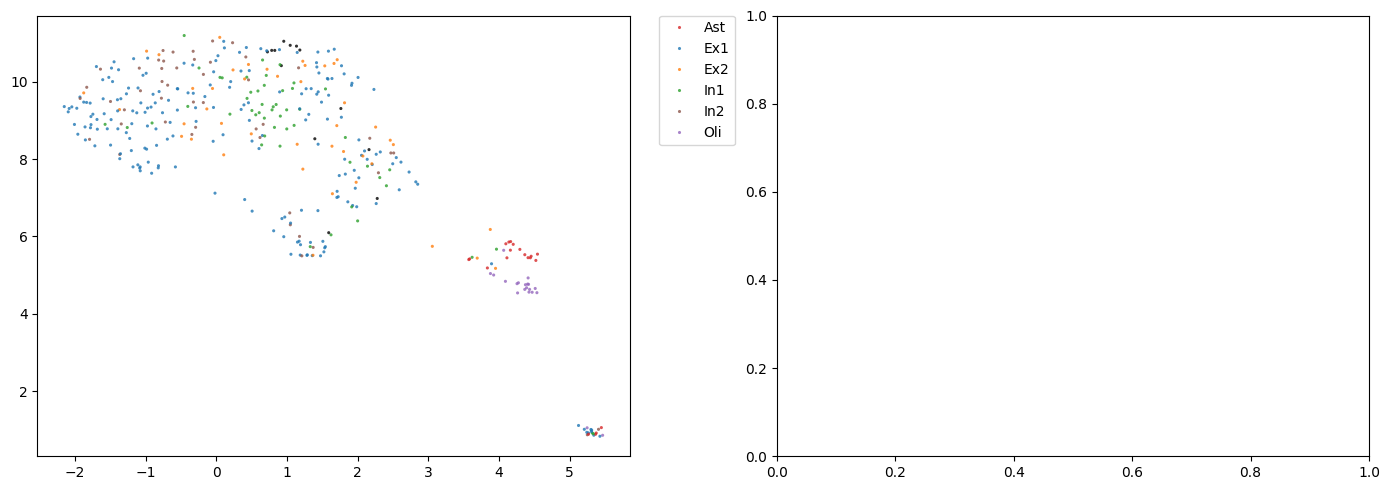

In [17]:
# Visualize embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

vec = UMAP(n_components=2, n_neighbors=25, random_state=0).fit_transform(cell_embeddings)
cell_type = higashi_model.label_info['cell type']
batch = higashi_model.label_info['batch']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0, hue_order=['Ex1','Ex2','In1', 'Ast','Oli','In2'])
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
#sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
#handles, labels = ax.get_legend_handles_labels()
#labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
#ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.show()

Try with 80 epochs

- Takes 150mins+ to run

In [ ]:
config = "/storage/ireneky/ireneky_cse428/config/config_brain_80.JSON" #change embedding epochs to 80
# Initialize the Higashi instance
higashi_model = Higashi(config)

# Data processing (only needs to be run for once)
higashi_model.process_data()
higashi_model.prep_model()

higashi_model.train_for_embeddings()

# Visualize embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

vec = UMAP(n_components=2, n_neighbors=25, random_state=0).fit_transform(cell_embeddings)
cell_type = higashi_model.label_info['cell type']
batch = higashi_model.label_info['batch']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0, hue_order=['Ex1','Ex2','In1', 'Ast','Oli','In2'])
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
#sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
#handles, labels = ax.get_legend_handles_labels()
#labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
#ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.show()

generating start/end dict for chromosome
extracting from data.txt
First calculating how many lines are there
There are 21291441 lines


 - Processing :   0%|          | 0/21291441 [00:00<?, ?it/s]

generating contact maps for baseline
data loaded
21291440 False


creating matrices tasks:   0%|          | 0/15 [00:00<?, ?it/s]

total_feats_size 259


  0%|          | 0/15 [00:00<?, ?it/s]

cpu_num 40
training on data from: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX']
total_sparsity_cell 0.3258552079150086
contractive loss
batch_size 512
Node type num [399 391 262 245 241 241 250 365 321 314 304 300 291 259 250 343] [ 399  790 1052 1297 1538 1779 2029 2394 2715 3029 3333 3633 3924 4183
 4433 4776]
start making attribute


  0%|          | 0/300 [00:00<?, ?it/s]

loss 0.30233773589134216 loss best 0.2998274862766266 epochs 268

initializing data generator


  0%|          | 0/15 [00:00<?, ?it/s]

initializing data generator


  0%|          | 0/15 [00:00<?, ?it/s]

First stage training
[ Epoch 0 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6953, mse:  0.5539,  acc: 31.961 %, pearson: 0.452, spearman: 0.284, elapse: 1150.048 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6662,  acc: 55.993 %,pearson: 0.732, spearman: 0.451,elapse: 0.966 s
update_rate: 0.927024	1.236684	update_rate: 0.000000	0.000000	pair_ratio: 0.1	
[ Epoch 1 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6548, mse:  0.4350,  acc: 54.538 %, pearson: 0.686, spearman: 0.432, elapse: 1049.860 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6590,  acc: 63.053 %,pearson: 0.724, spearman: 0.484,elapse: 0.964 s
update_rate: 1.353843	39.736576	pair_ratio: 0.2	
[ Epoch 2 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6464, mse:  0.3592,  acc: 50.815 %, pearson: 0.727, spearman: 0.459, elapse: 1083.887 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6375,  acc: 59.287 %,pearson: 0.758, spearman: 0.527,elapse: 0.948 s
update_rate: 0.268923	0.941723	pair_ratio: 0.3	
[ Epoch 3 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6451, mse:  0.3265,  acc: 44.559 %, pearson: 0.743, spearman: 0.488, elapse: 960.680 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6600,  acc: 47.822 %,pearson: 0.735, spearman: 0.539,elapse: 0.953 s
update_rate: 0.124392	0.255287	pair_ratio: 0.4	
[ Epoch 4 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6435, mse:  0.3090,  acc: 41.960 %, pearson: 0.745, spearman: 0.499, elapse: 1014.765 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6514,  acc: 51.878 %,pearson: 0.737, spearman: 0.528,elapse: 0.958 s
update_rate: 0.203173	0.328990	pair_ratio: 0.5	
[ Epoch 5 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6418, mse:  0.2996,  acc: 41.941 %, pearson: 0.758, spearman: 0.501, elapse: 953.014 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6429,  acc: 46.465 %,pearson: 0.770, spearman: 0.533,elapse: 0.953 s
update_rate: 0.129118	0.208149	
[ Epoch 6 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6425, mse:  0.2970,  acc: 40.824 %, pearson: 0.761, spearman: 0.502, elapse: 1054.144 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6365,  acc: 45.173 %,pearson: 0.791, spearman: 0.513,elapse: 1.193 s
update_rate: 0.051165	0.124507	
[ Epoch 7 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6417, mse:  0.2921,  acc: 42.480 %, pearson: 0.763, spearman: 0.505, elapse: 950.877 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6502,  acc: 49.215 %,pearson: 0.791, spearman: 0.532,elapse: 1.020 s
update_rate: 0.035886	0.056005	
[ Epoch 8 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6417, mse:  0.2903,  acc: 40.179 %, pearson: 0.770, spearman: 0.500, elapse: 862.221 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6580,  acc: 44.131 %,pearson: 0.780, spearman: 0.531,elapse: 0.966 s
update_rate: 0.013933	0.058755	
[ Epoch 9 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6407, mse:  0.2870,  acc: 42.407 %, pearson: 0.770, spearman: 0.504, elapse: 957.712 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6331,  acc: 55.550 %,pearson: 0.789, spearman: 0.522,elapse: 0.958 s
update_rate: 0.019421	0.044180	
[ Epoch 10 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6412, mse:  0.2846,  acc: 42.817 %, pearson: 0.771, spearman: 0.503, elapse: 948.941 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6392,  acc: 55.482 %,pearson: 0.789, spearman: 0.525,elapse: 0.965 s
update_rate: 0.011283	0.057355	
[ Epoch 11 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6396, mse:  0.2811,  acc: 45.589 %, pearson: 0.773, spearman: 0.510, elapse: 937.009 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6289,  acc: 56.735 %,pearson: 0.774, spearman: 0.537,elapse: 1.011 s
update_rate: 0.010736	0.056464	
[ Epoch 12 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6386, mse:  0.2812,  acc: 44.272 %, pearson: 0.774, spearman: 0.505, elapse: 939.406 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6395,  acc: 47.158 %,pearson: 0.813, spearman: 0.522,elapse: 0.964 s
update_rate: 0.011685	0.026884	
[ Epoch 13 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6408, mse:  0.2784,  acc: 41.802 %, pearson: 0.782, spearman: 0.500, elapse: 953.366 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6453,  acc: 49.857 %,pearson: 0.779, spearman: 0.519,elapse: 0.975 s
update_rate: 0.011656	0.033983	
[ Epoch 14 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6393, mse:  0.2773,  acc: 42.147 %, pearson: 0.780, spearman: 0.502, elapse: 864.993 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6492,  acc: 49.967 %,pearson: 0.782, spearman: 0.500,elapse: 0.991 s
update_rate: 0.014057	0.018033	
[ Epoch 15 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6397, mse:  0.2761,  acc: 40.780 %, pearson: 0.777, spearman: 0.497, elapse: 927.841 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6390,  acc: 50.934 %,pearson: 0.741, spearman: 0.526,elapse: 1.017 s
update_rate: 0.013596	0.026045	
[ Epoch 16 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6400, mse:  0.2741,  acc: 42.592 %, pearson: 0.781, spearman: 0.505, elapse: 905.480 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6431,  acc: 50.869 %,pearson: 0.788, spearman: 0.520,elapse: 1.337 s
update_rate: 0.020592	0.038151	
[ Epoch 17 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6381, mse:  0.2730,  acc: 43.727 %, pearson: 0.778, spearman: 0.506, elapse: 869.730 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6467,  acc: 50.804 %,pearson: 0.790, spearman: 0.530,elapse: 1.438 s
update_rate: 0.011373	0.020621	
[ Epoch 18 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6383, mse:  0.2724,  acc: 46.936 %, pearson: 0.787, spearman: 0.512, elapse: 892.326 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6383,  acc: 54.066 %,pearson: 0.795, spearman: 0.538,elapse: 0.949 s
update_rate: 0.010028	0.029637	
[ Epoch 19 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6387, mse:  0.2695,  acc: 46.484 %, pearson: 0.785, spearman: 0.512, elapse: 922.881 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6353,  acc: 50.957 %,pearson: 0.765, spearman: 0.537,elapse: 0.968 s
update_rate: 0.017958	0.034721	
[ Epoch 20 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6384, mse:  0.2693,  acc: 46.628 %, pearson: 0.788, spearman: 0.511, elapse: 833.690 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6390,  acc: 54.925 %,pearson: 0.789, spearman: 0.532,elapse: 0.961 s
update_rate: 0.012420	0.016594	
[ Epoch 21 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6396, mse:  0.2683,  acc: 47.391 %, pearson: 0.787, spearman: 0.510, elapse: 855.366 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6446,  acc: 56.999 %,pearson: 0.784, spearman: 0.530,elapse: 0.955 s
update_rate: 0.010284	0.016700	
[ Epoch 22 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6382, mse:  0.2678,  acc: 47.131 %, pearson: 0.786, spearman: 0.512, elapse: 804.591 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6434,  acc: 55.443 %,pearson: 0.794, spearman: 0.533,elapse: 0.948 s
update_rate: 0.011598	0.018897	
[ Epoch 23 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6393, mse:  0.2663,  acc: 48.598 %, pearson: 0.786, spearman: 0.516, elapse: 891.745 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6315,  acc: 56.660 %,pearson: 0.799, spearman: 0.533,elapse: 0.959 s
update_rate: 0.012774	0.028473	
[ Epoch 24 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.6387, mse:  0.2654,  acc: 49.188 %, pearson: 0.787, spearman: 0.517, elapse: 907.609 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.6429,  acc: 54.355 %,pearson: 0.785, spearman: 0.534,elapse: 1.021 s
update_rate: 0.007848	0.013593	
[ Epoch 25 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

Process ForkProcess-720:
Process ForkProcess-692:
Process ForkProcess-691:
Process ForkProcess-715:
Process ForkProcess-708:
Process ForkProcess-695:
Process ForkProcess-644:
Process ForkProcess-712:
Process ForkProcess-653:
Process ForkProcess-679:
Process ForkProcess-666:
Process ForkProcess-699:
Process ForkProcess-719:
Process ForkProcess-684:
Process ForkProcess-705:
Process ForkProcess-670:
Process ForkProcess-668:
Process ForkProcess-663:
Process ForkProcess-703:
Process ForkProcess-701:
Process ForkProcess-696:
Process ForkProcess-655:
Process ForkProcess-700:
Process ForkProcess-706:
Process ForkProcess-683:
Process ForkProcess-688:
Process ForkProcess-709:
Process ForkProcess-687:
Process ForkProcess-649:
Process ForkProcess-672:
Process ForkProcess-667:
Process ForkProcess-689:
Process ForkProcess-718:
Process ForkProcess-643:
Process ForkProcess-680:
Process ForkProcess-685:
Process ForkProcess-650:
Process ForkProcess-714:
Process ForkProcess-673:
Process ForkProcess-659:


KeyboardInterrupt: 

Scores

In [19]:
from sklearn.metrics import silhouette_score

# Assume: umap_embedding = 2D array (n_cells x 2), cell_type = categorical labels
score = silhouette_score(cell_embeddings, cell_type)
print("Silhouette score:", score)


Silhouette score: -0.113127284


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans_labels = KMeans(n_clusters=6).fit_predict(cell_embeddings)
print("KMeans labels:", kmeans_labels)
ari = adjusted_rand_score(cell_type, kmeans_labels)
print("Adjusted Rand Index:", ari)
nmi = normalized_mutual_info_score(cell_type, kmeans_labels)
print("Normalized Mutual Information:", nmi)


KMeans labels: [3 2 5 2 0 4 2 4 3 2 4 3 2 0 0 0 2 2 0 2 3 2 4 0 2 2 0 4 3 2 0 0 0 2 0 2 0
 0 0 2 4 0 0 2 4 3 2 3 2 3 4 4 3 3 3 3 2 3 5 4 2 3 2 3 2 5 3 2 2 4 3 5 4 0
 2 0 0 0 3 3 2 0 3 2 3 2 3 3 5 2 0 2 2 2 3 2 0 3 2 0 3 2 0 3 4 3 4 3 3 2 3
 4 3 3 3 0 4 2 5 2 3 4 2 2 4 4 4 3 4 3 2 3 4 2 0 0 3 3 2 3 3 3 3 3 3 3 4 2
 2 3 2 3 3 2 3 3 3 3 3 3 3 3 4 2 3 3 3 2 3 2 3 2 2 2 2 3 3 3 3 3 4 3 2 4 3
 4 4 3 2 3 4 3 3 0 2 4 5 2 2 3 2 2 3 3 2 2 3 3 2 2 3 2 3 2 4 2 3 2 2 3 2 3
 3 4 3 3 2 3 2 2 0 2 0 0 0 0 2 0 4 5 0 2 0 0 2 0 2 0 5 0 0 0 0 0 5 5 1 0 0
 0 4 5 4 0 1 1 1 1 0 5 2 5 3 3 2 1 1 2 2 1 1 1 0 1 1 0 1 1 1 2 1 3 0 1 3 1
 3 2 3 3 2 2 3 3 2 3 2 3 3 2 3 0 2 3 0 3 3 0 3 2 2 3 3 3 3 2 3 0 4 3 2 3 3
 3 3 3 3 3 3 4 2 2 2 2 2 3 3 3 3 3 2 3 3 3 2 3 2 3 2 2 3 2 5 2 4 4 0 2 3 5
 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5]
Adjusted Rand Index: 0.10084358388331065
Normalized Mutual Information: 0.22294480118739984
